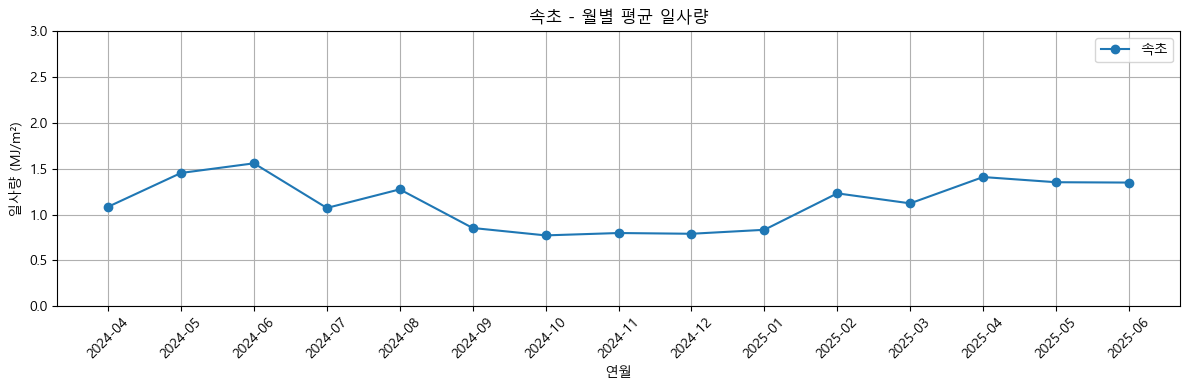

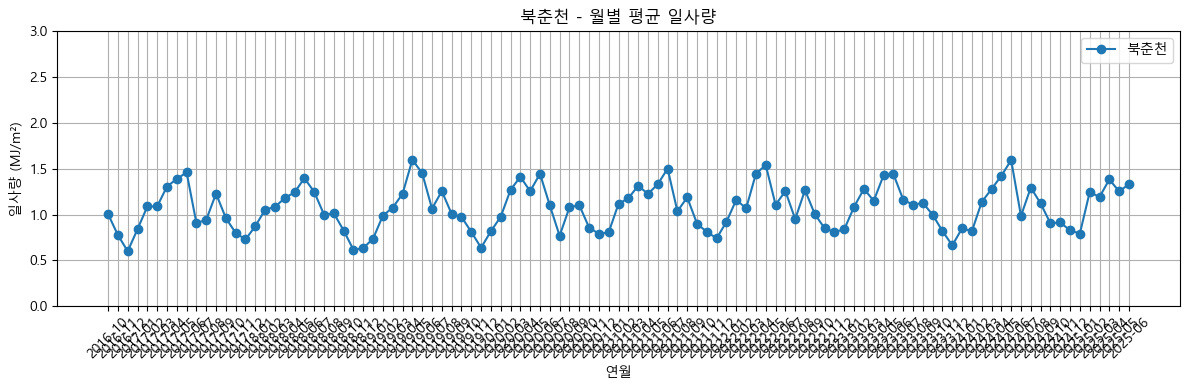

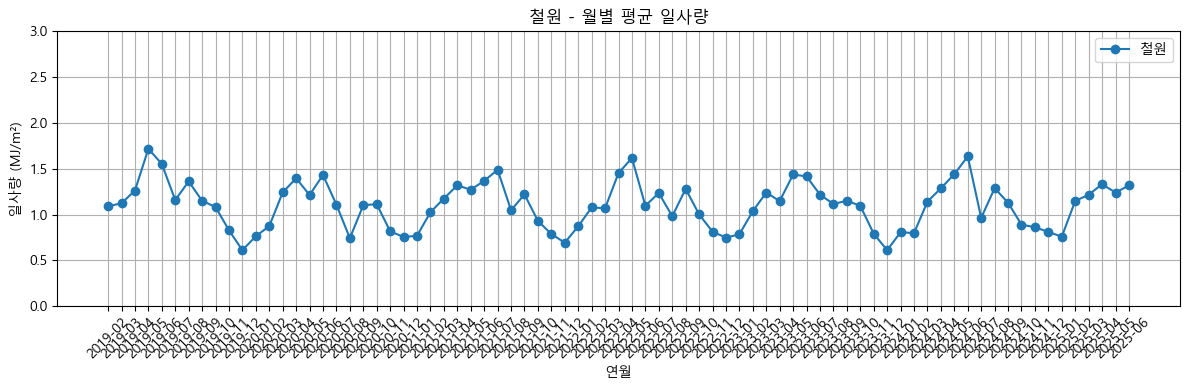

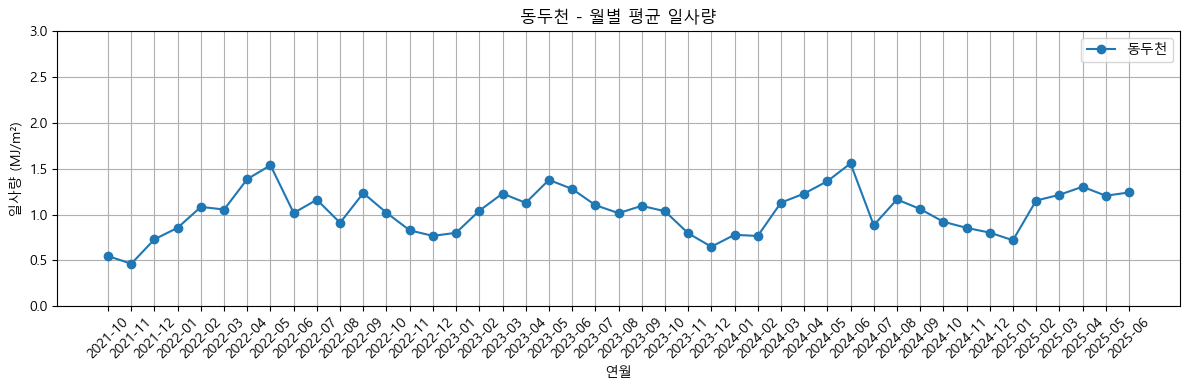

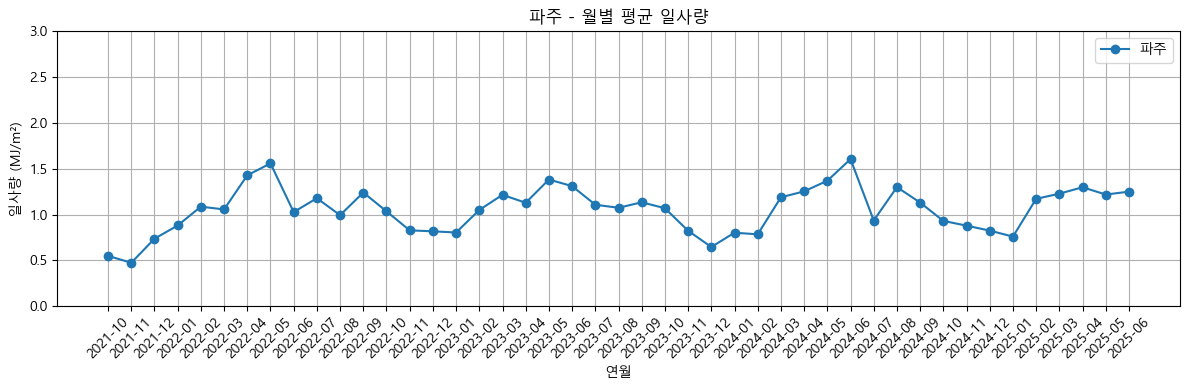

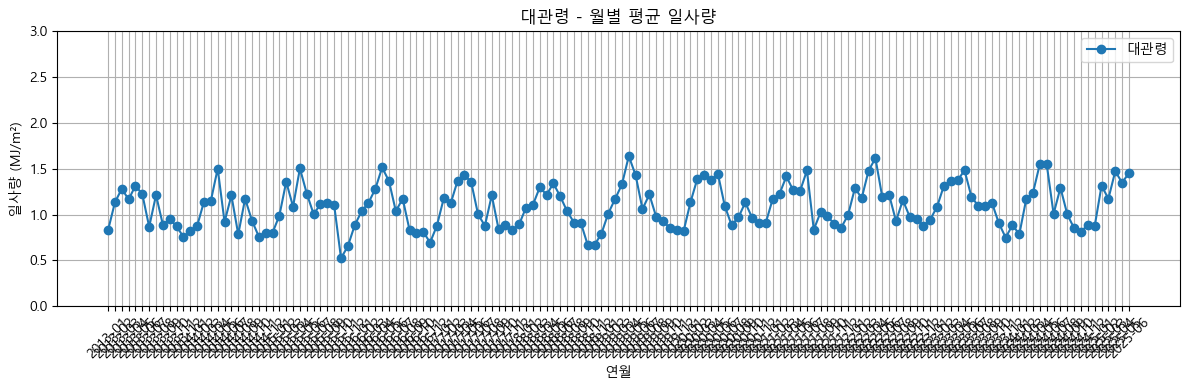

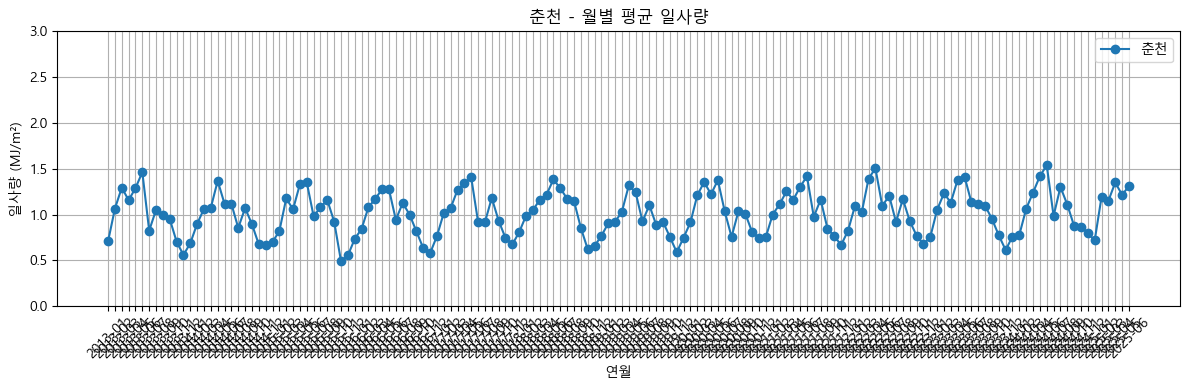

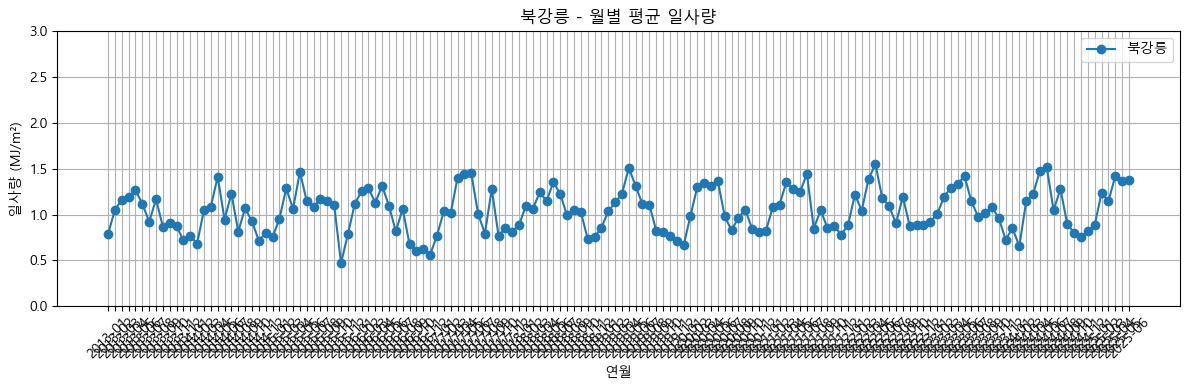

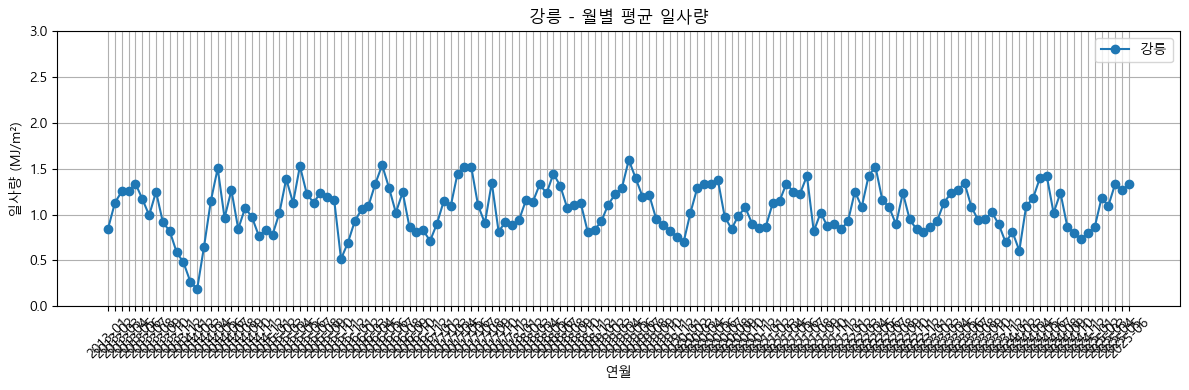

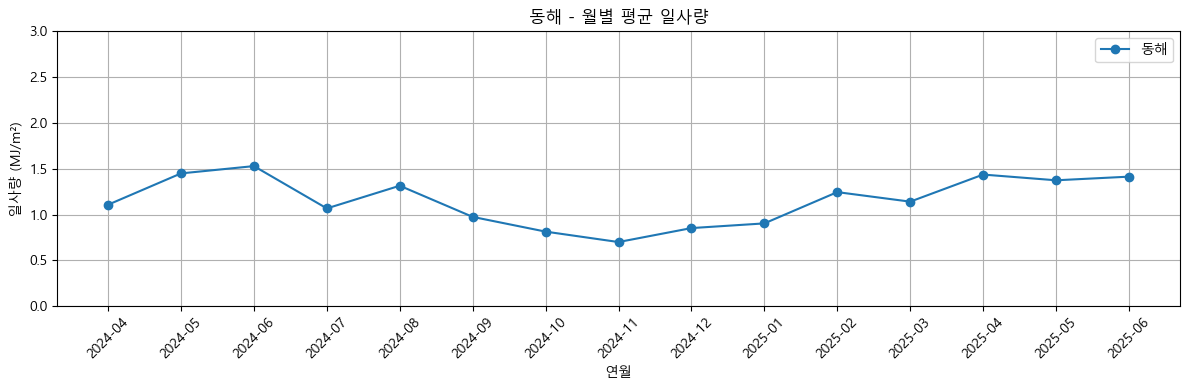

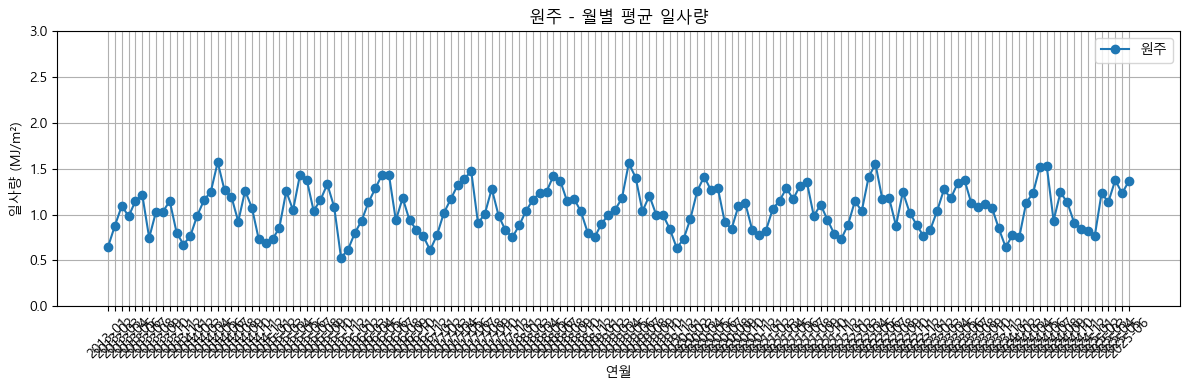

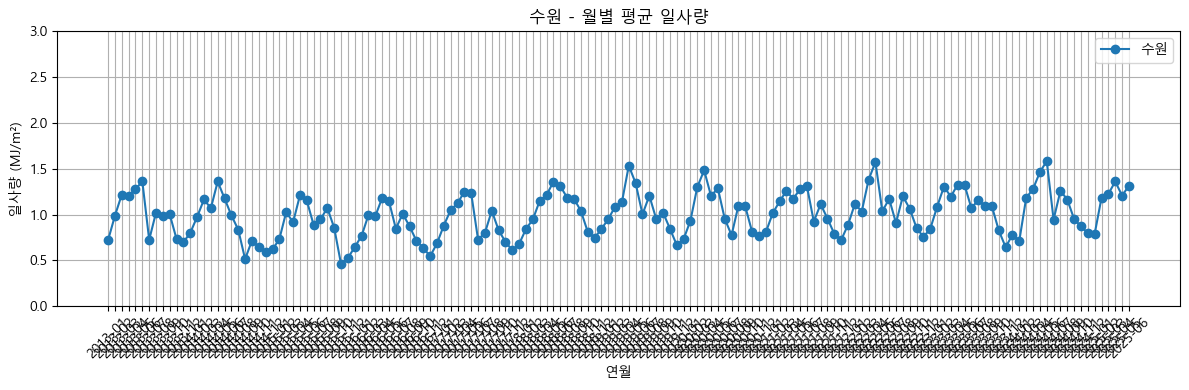

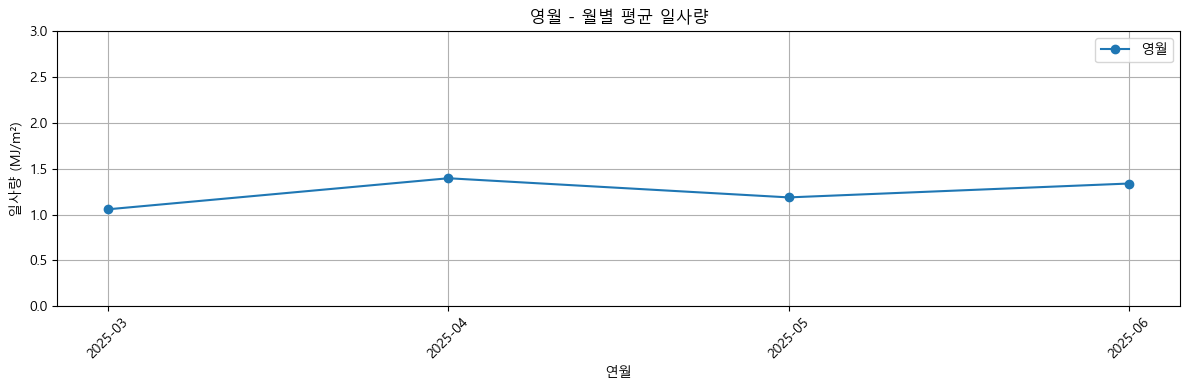

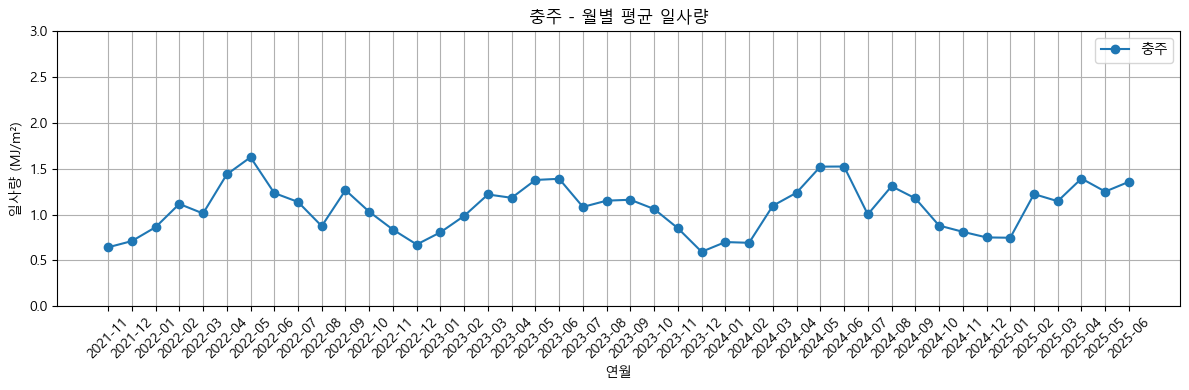

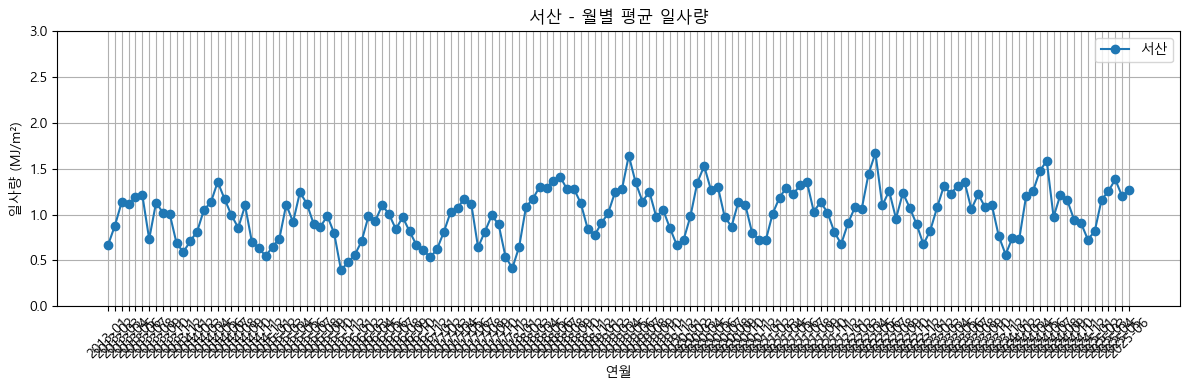

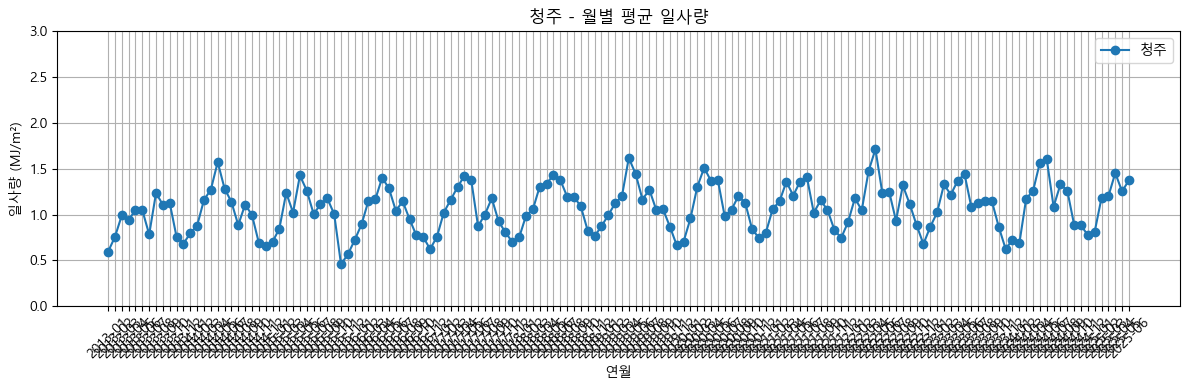

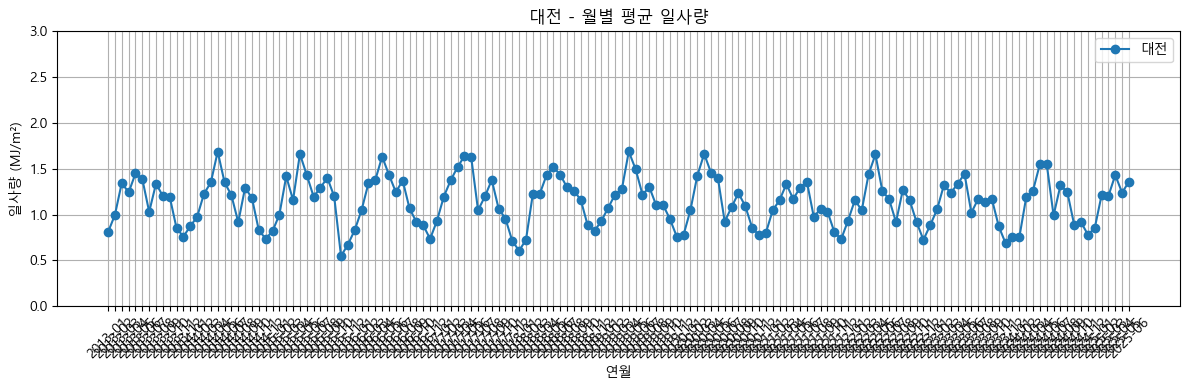

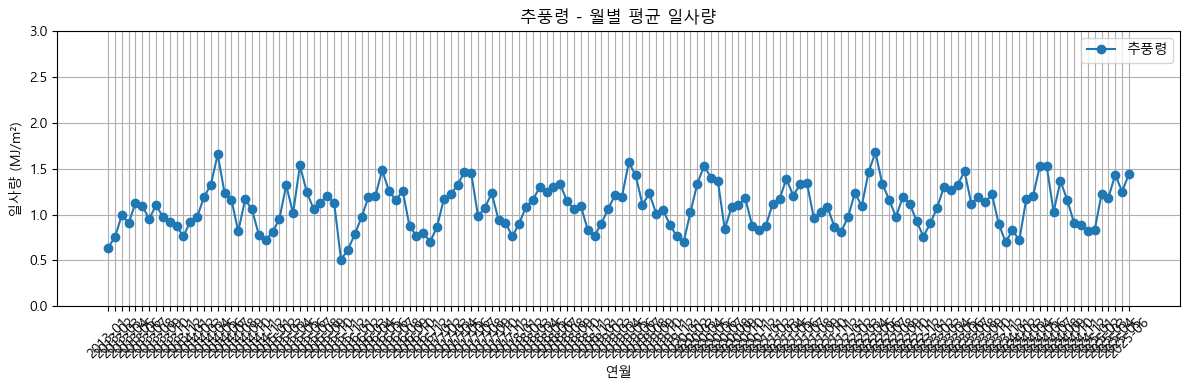

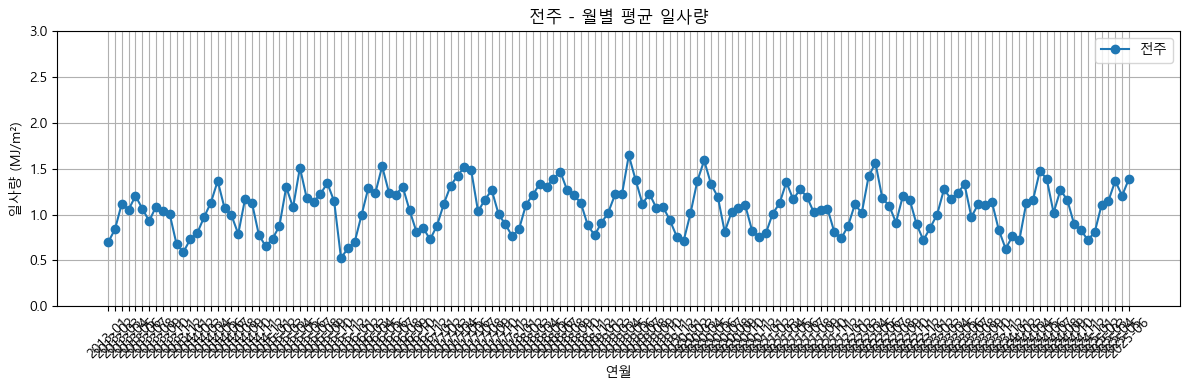

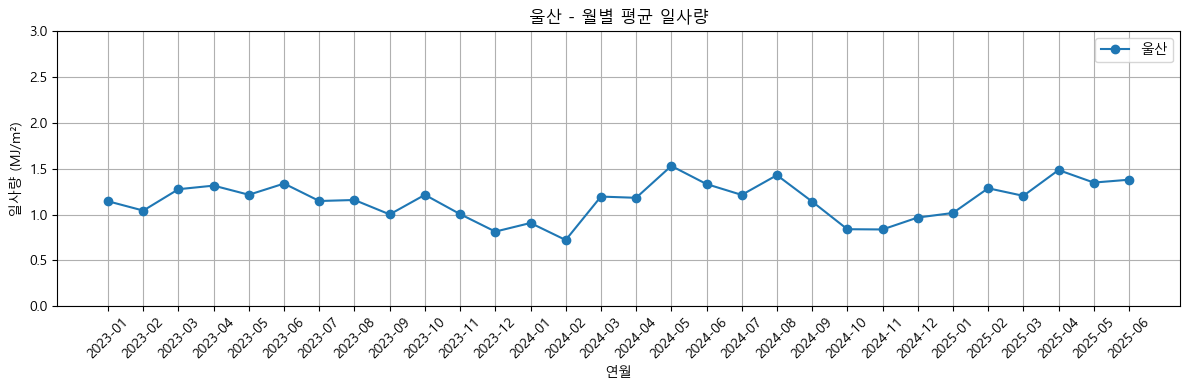

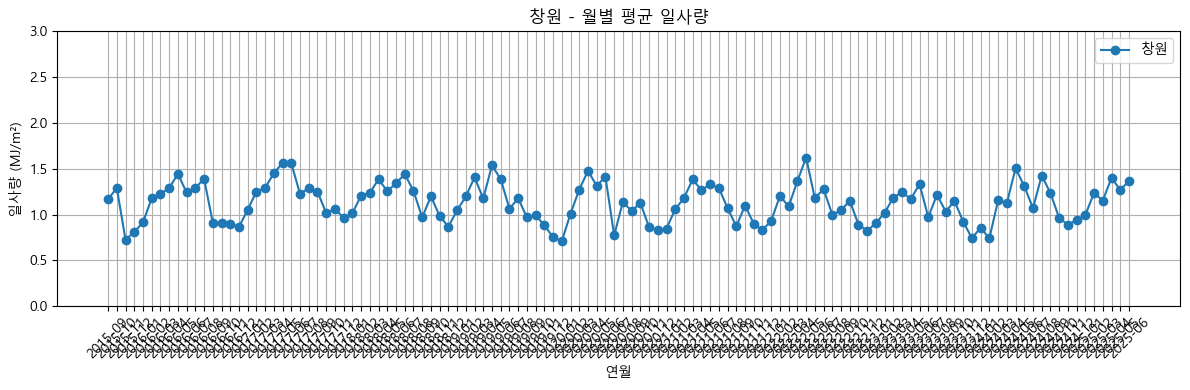

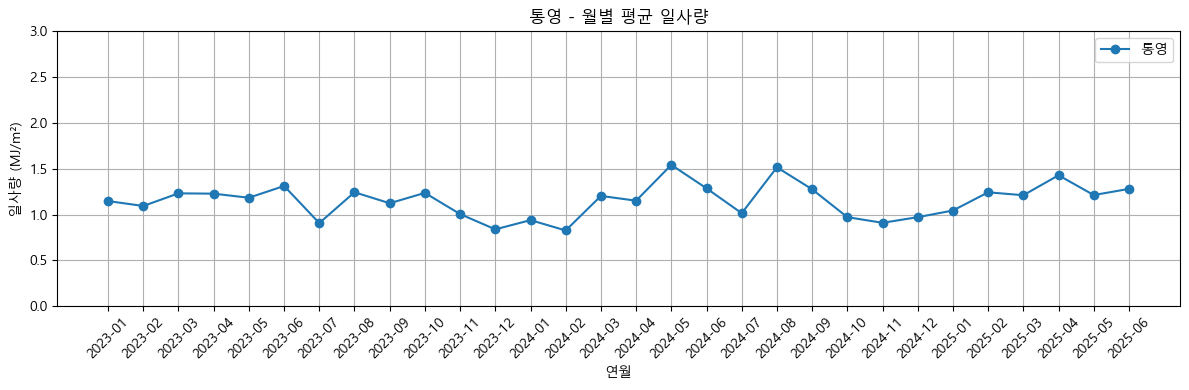

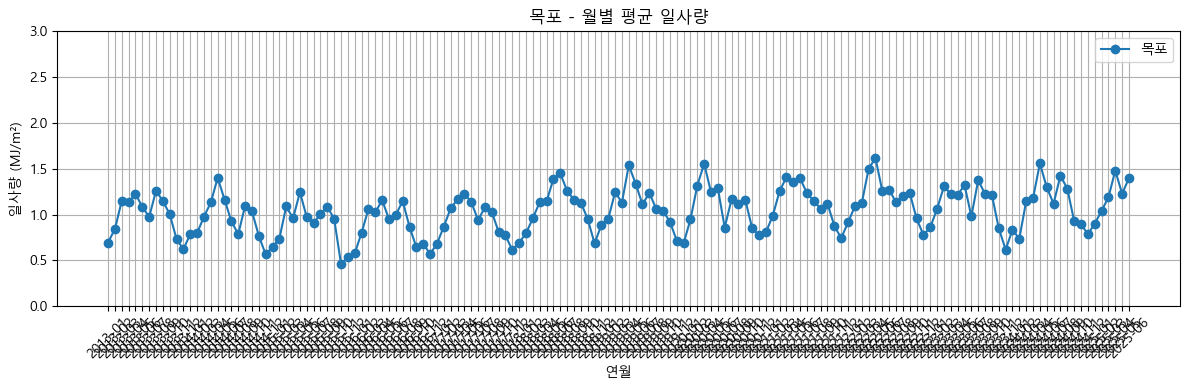

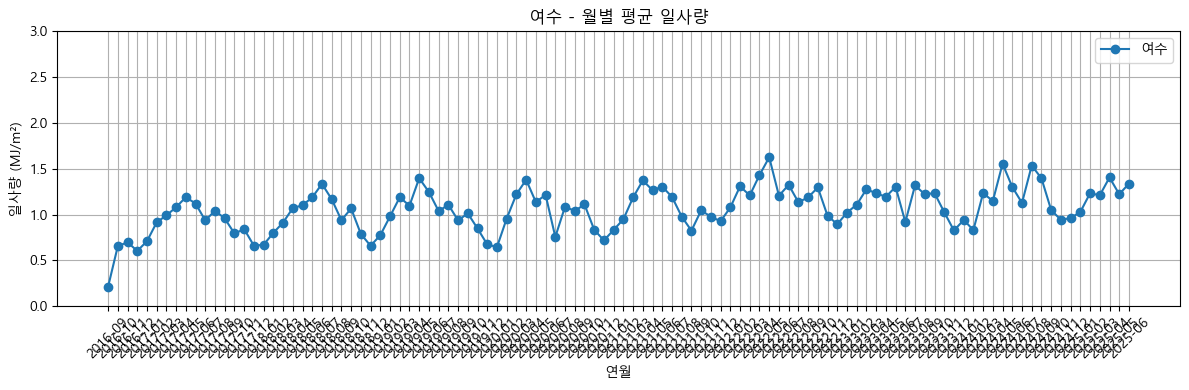

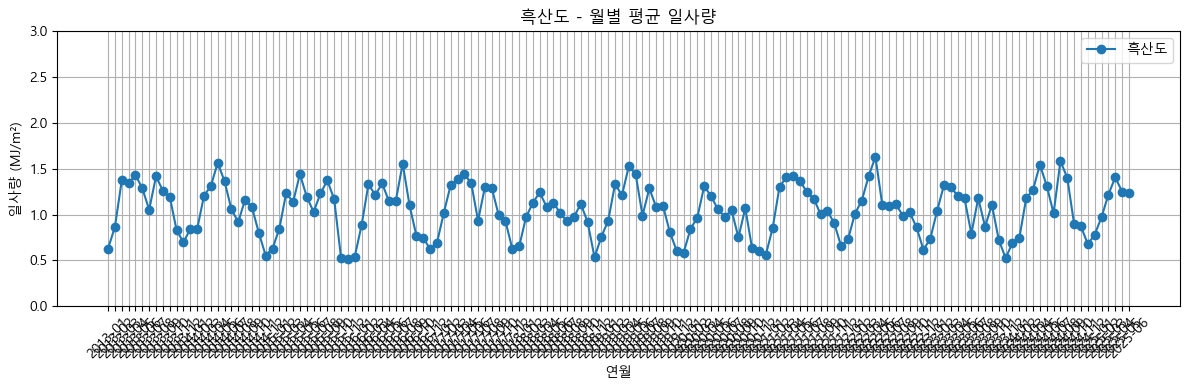

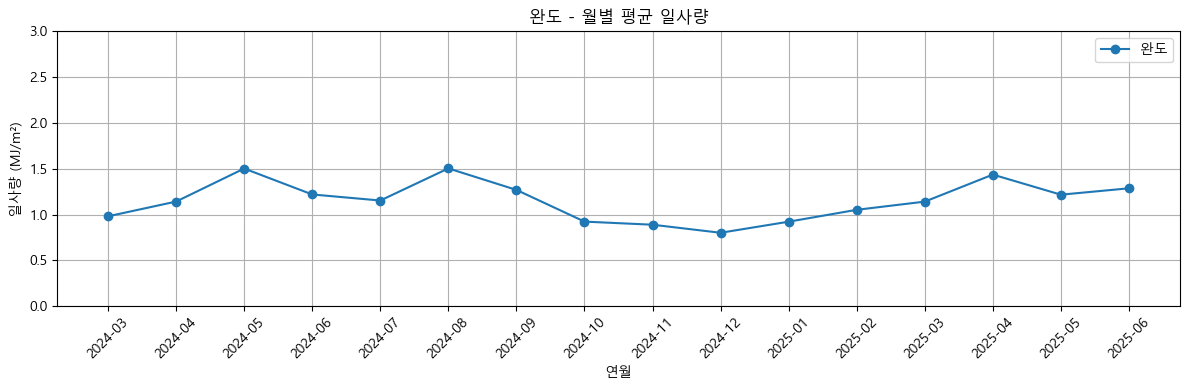

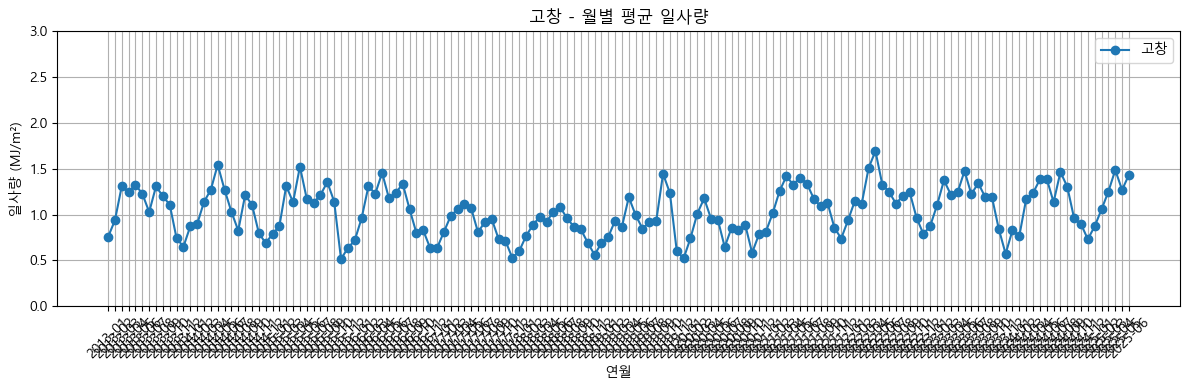

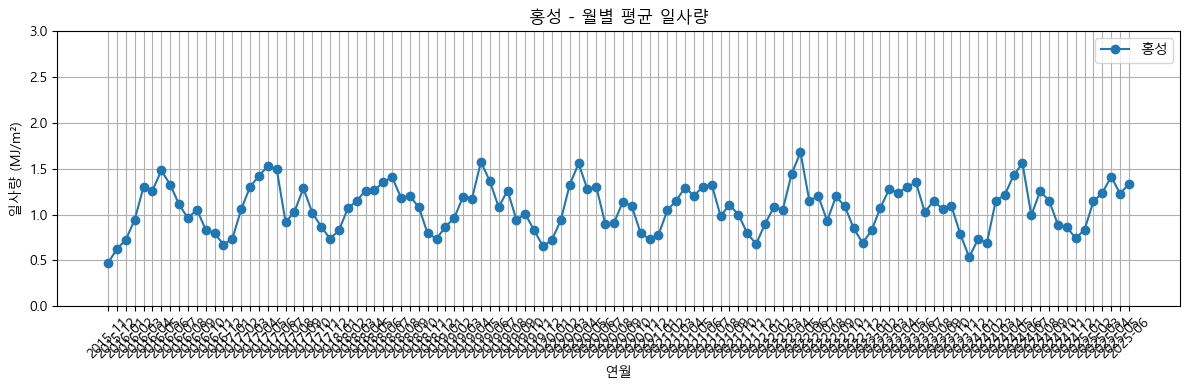

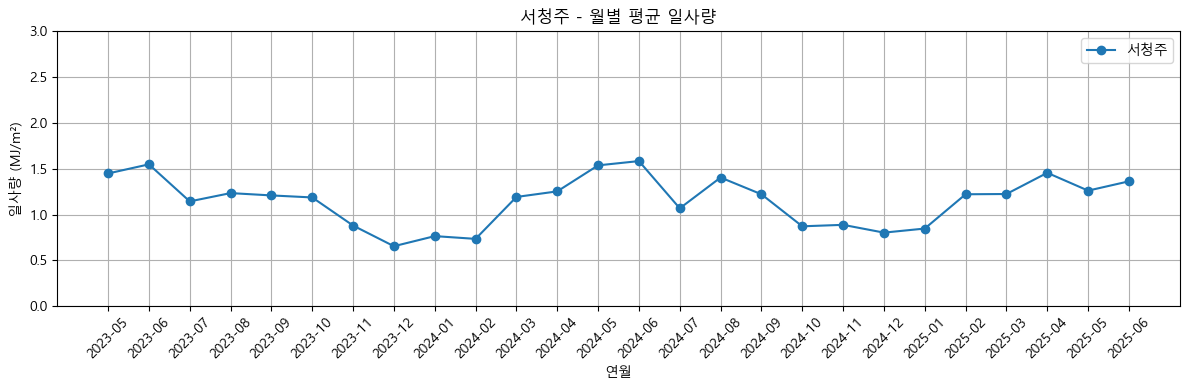

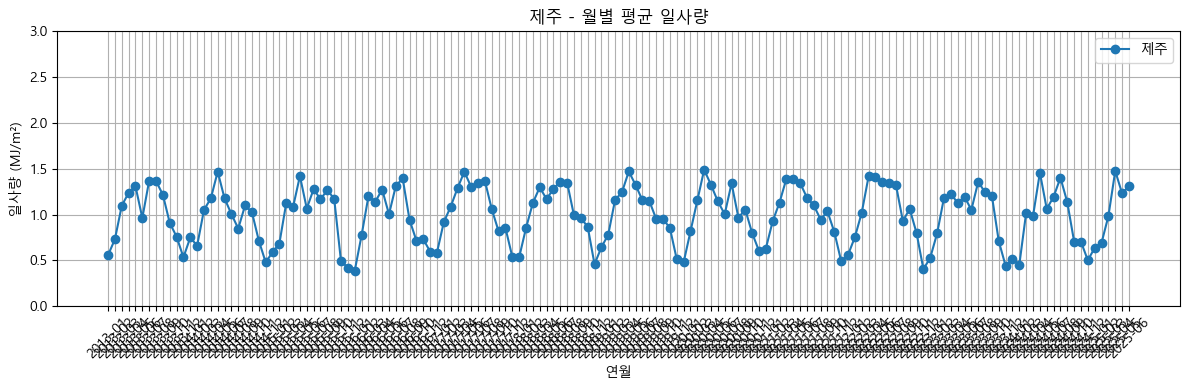

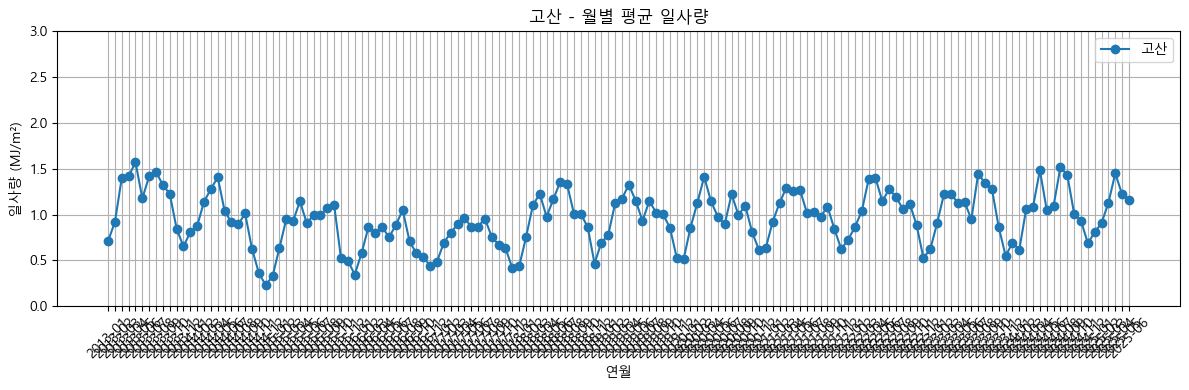

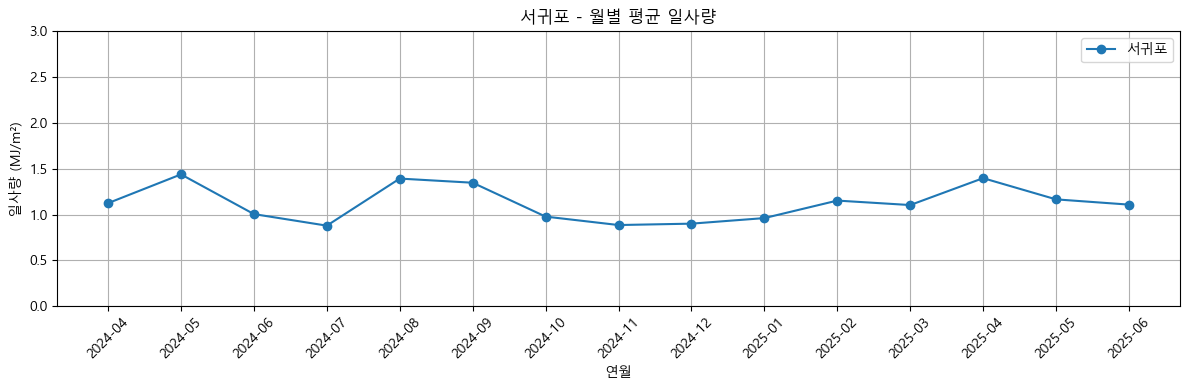

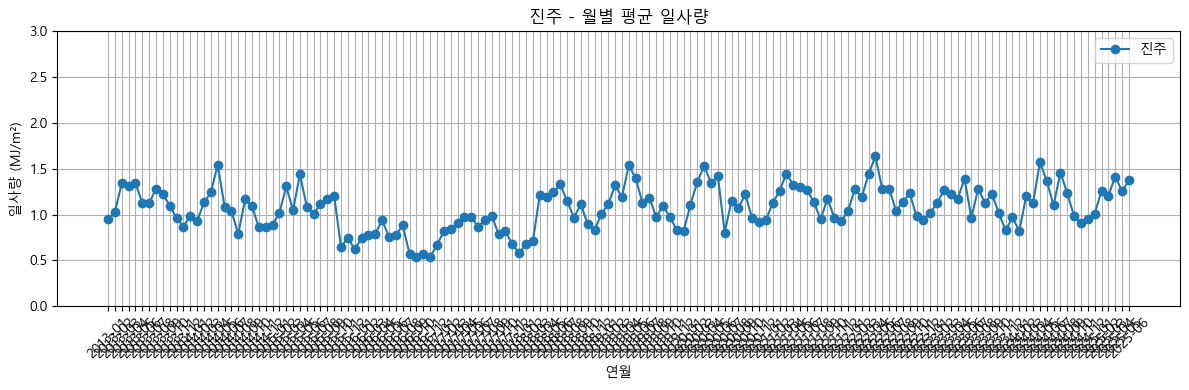

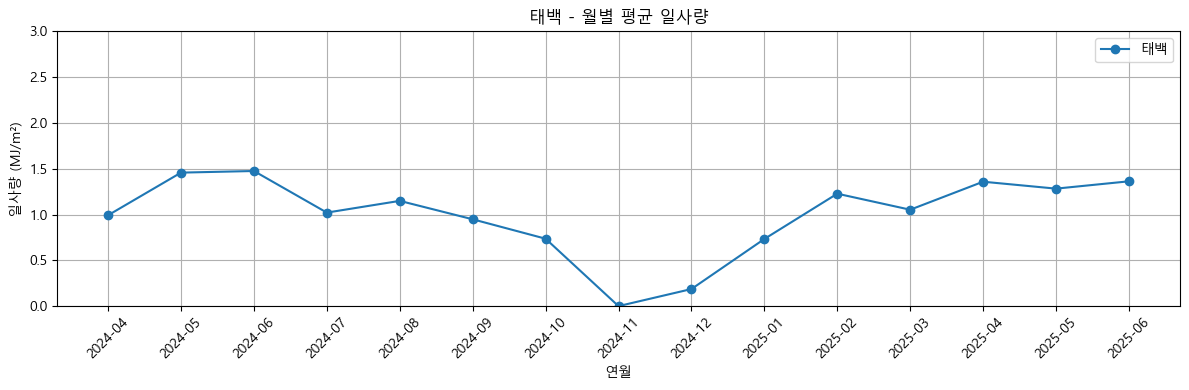

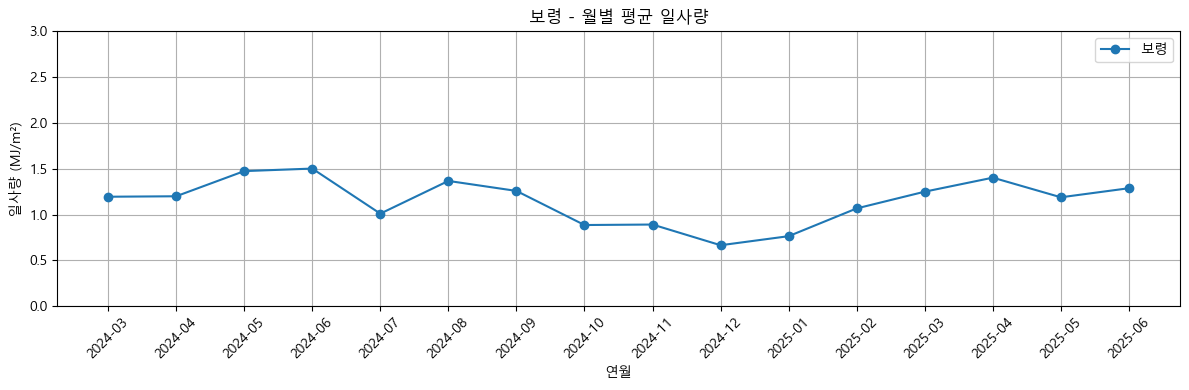

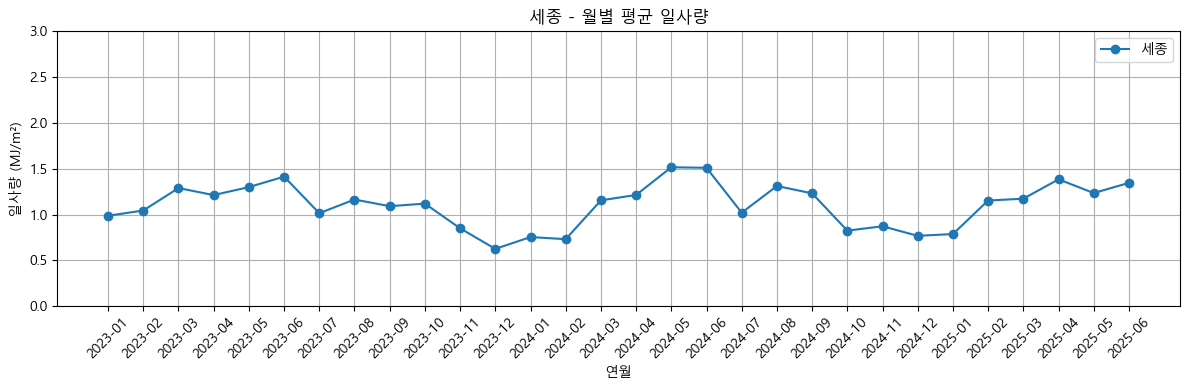

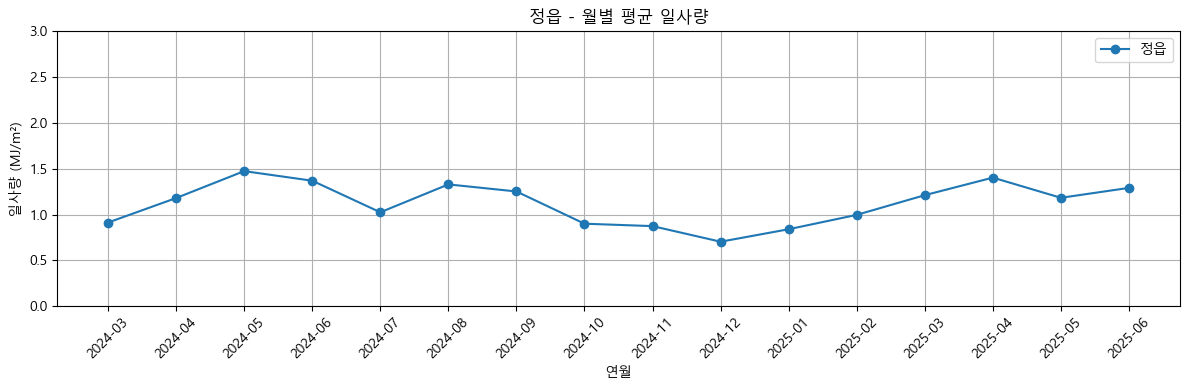

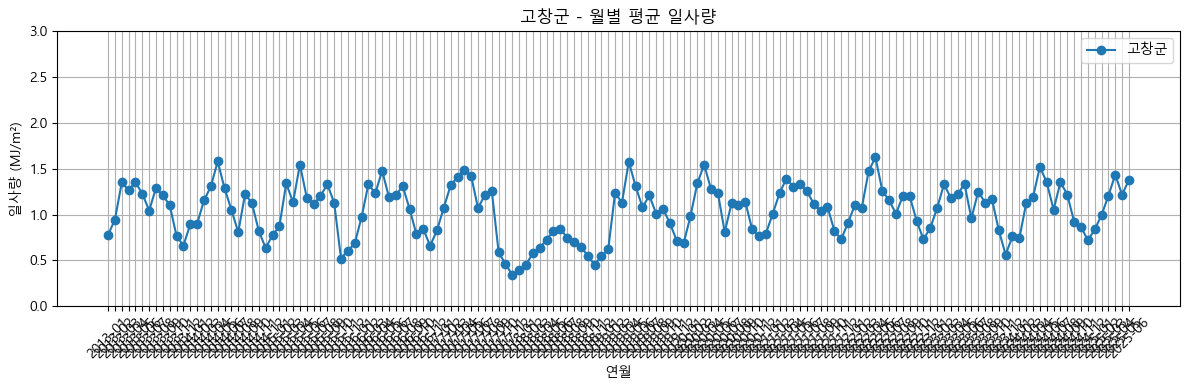

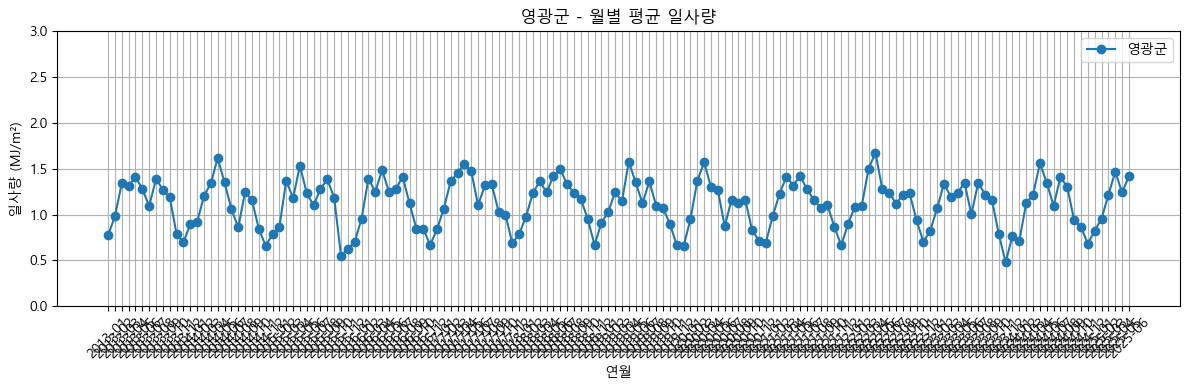

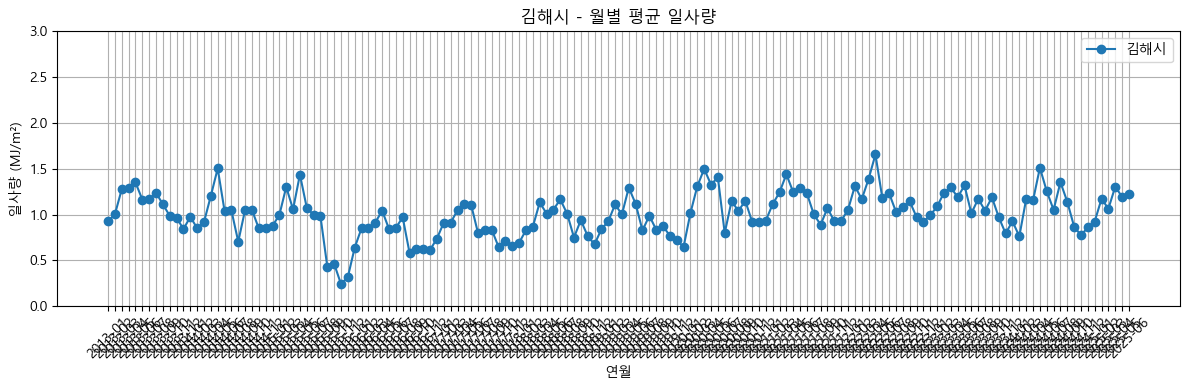

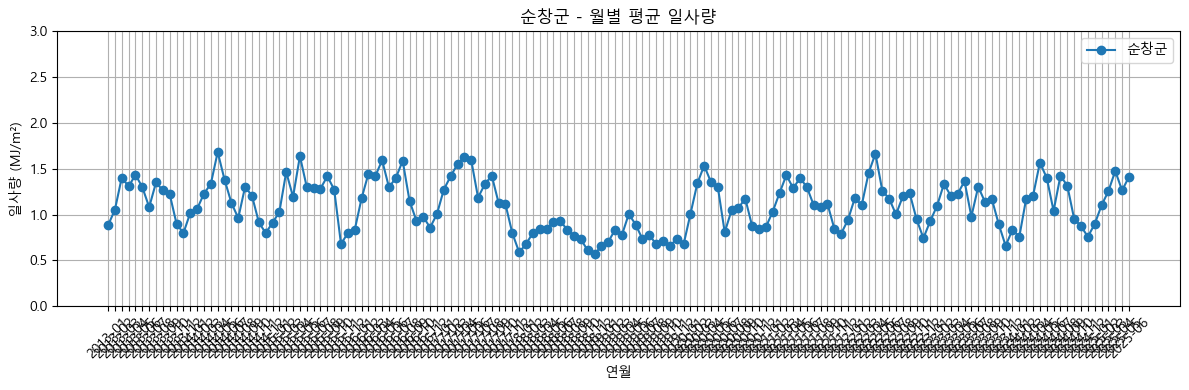

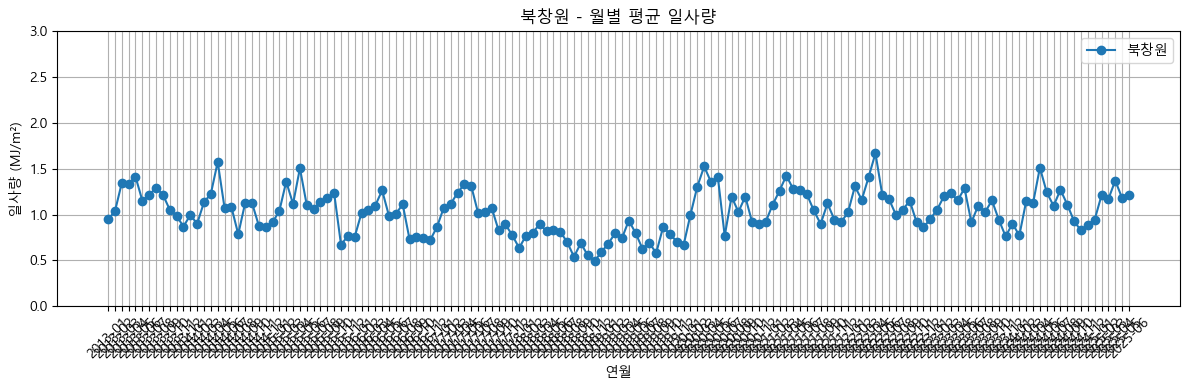

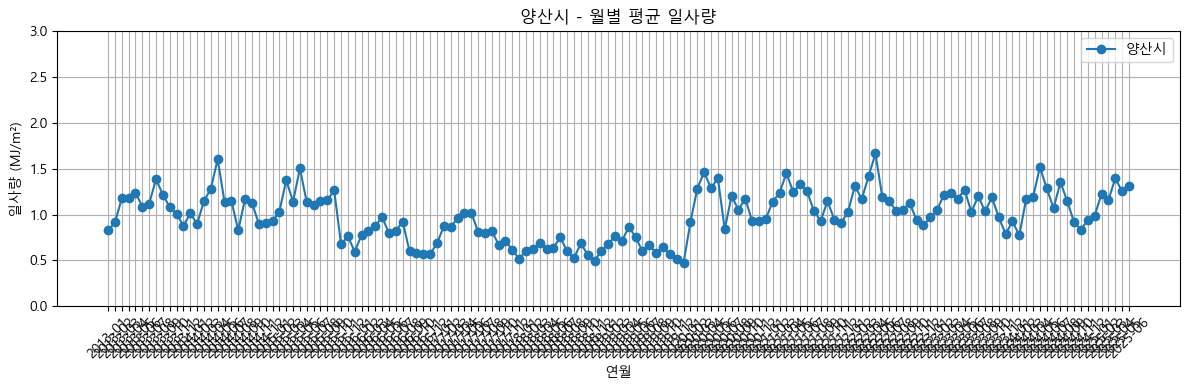

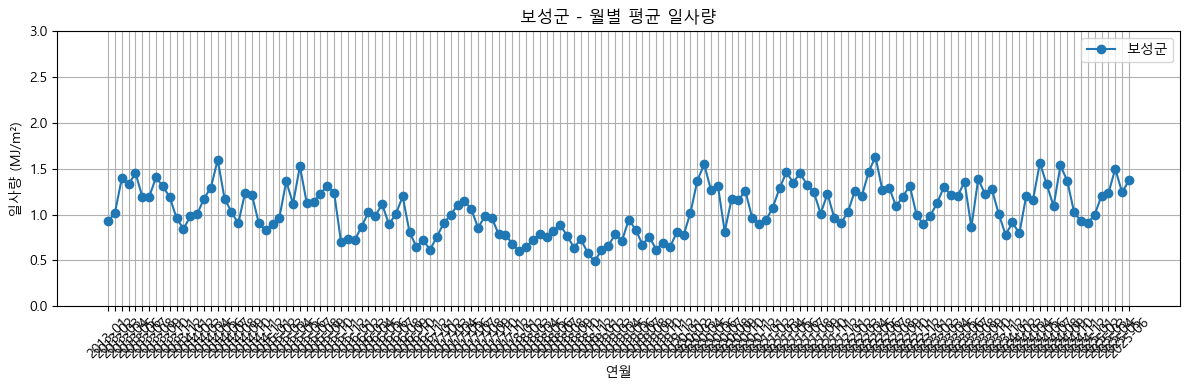

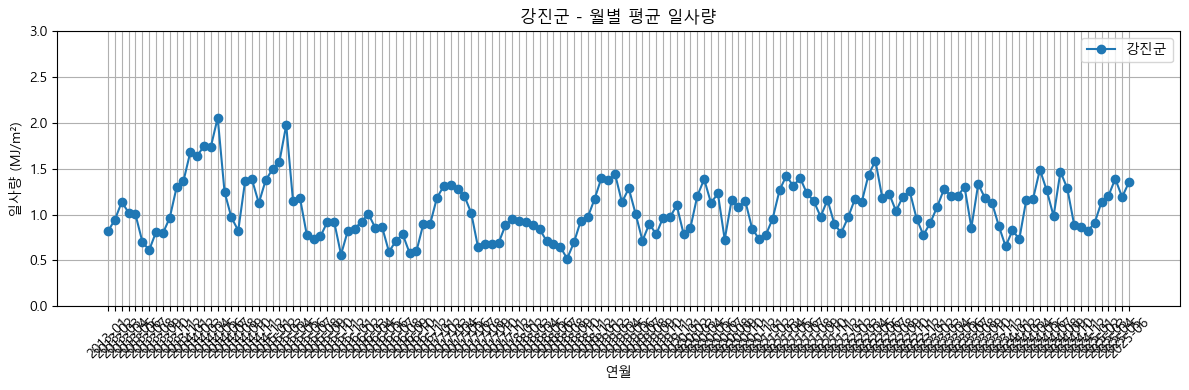

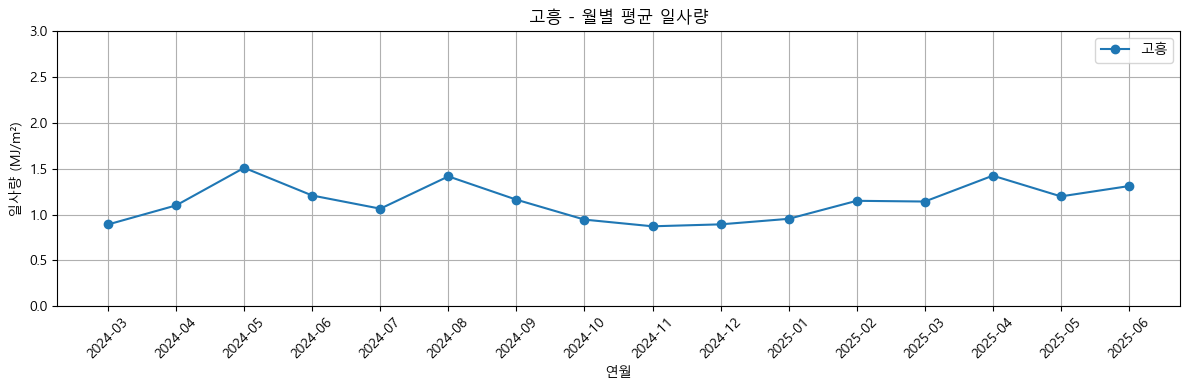

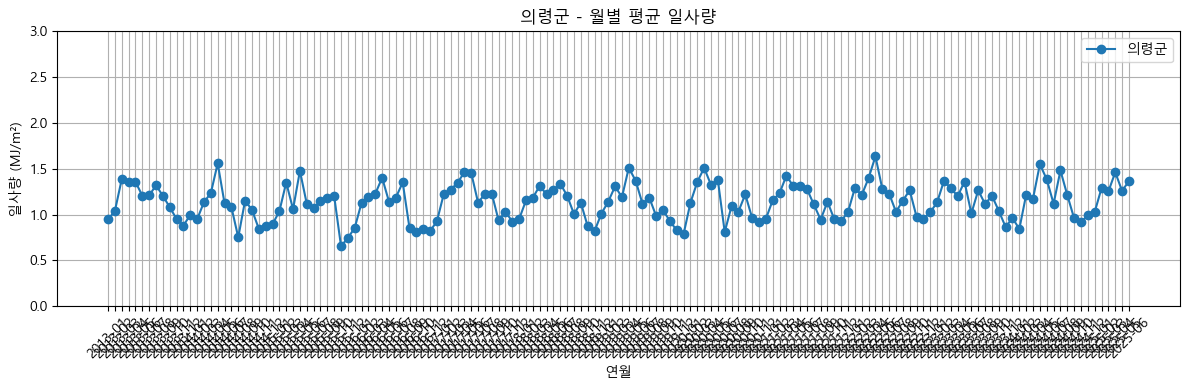

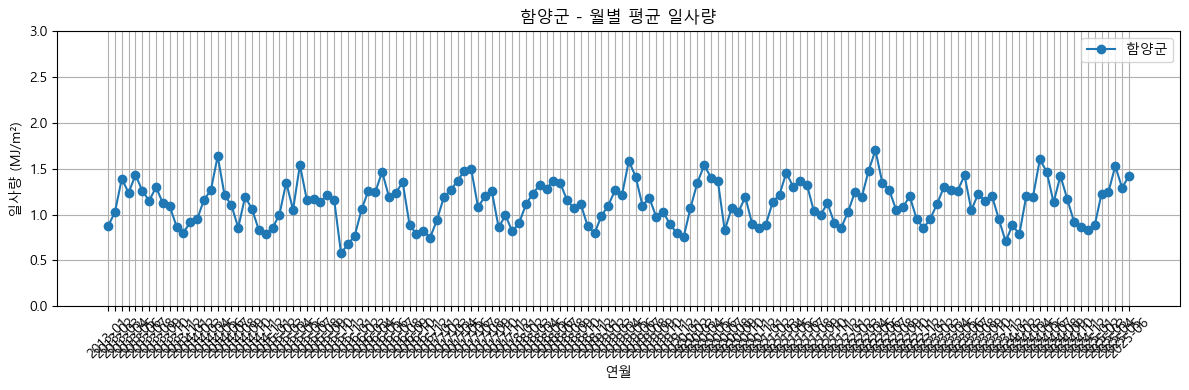

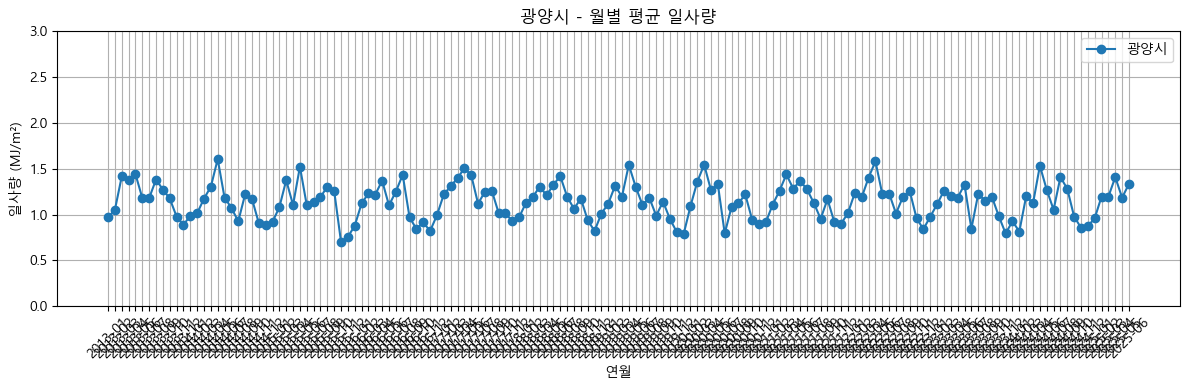

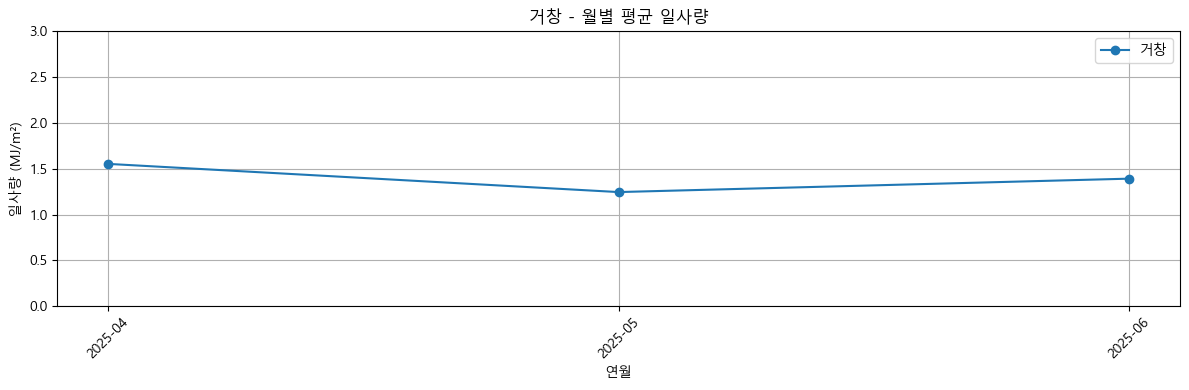

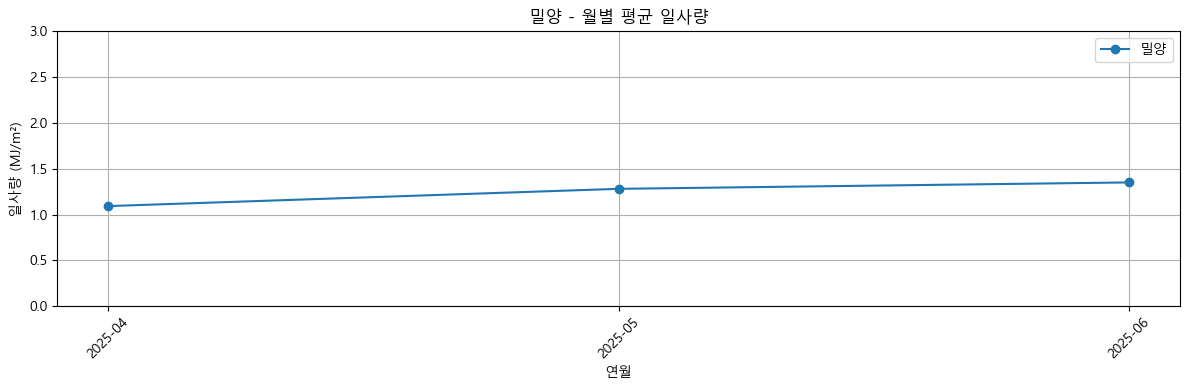

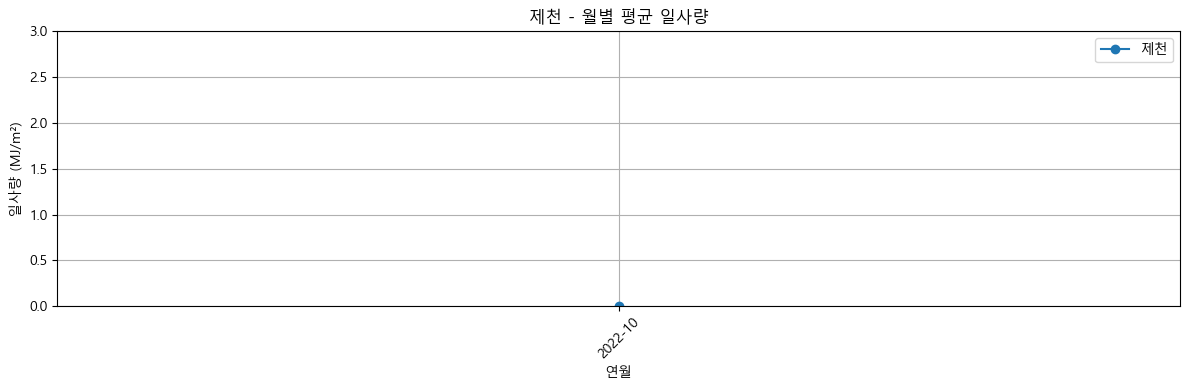

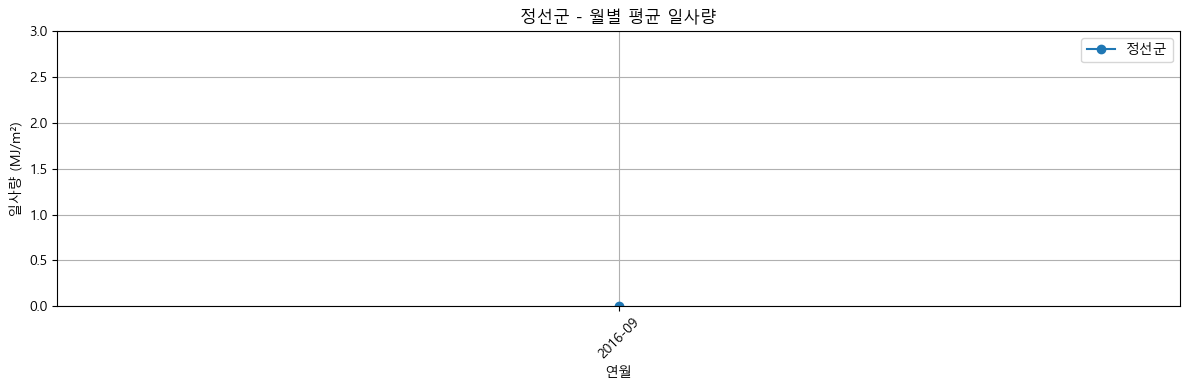

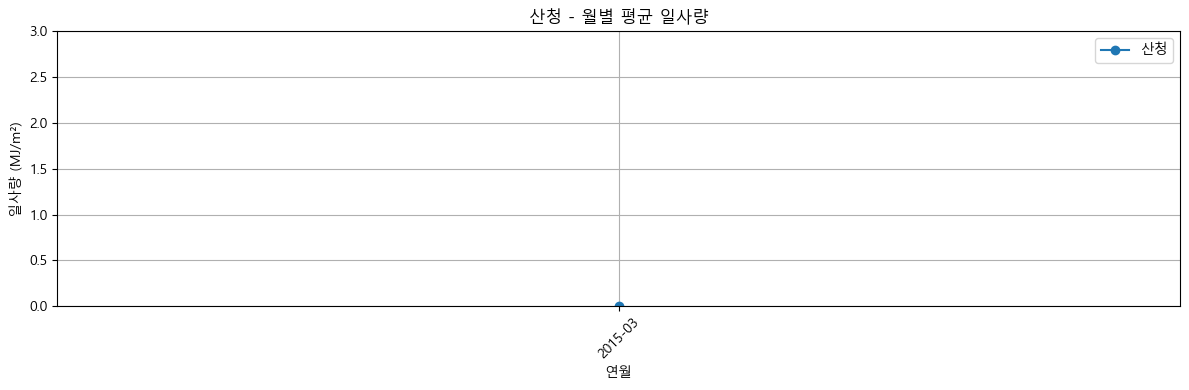

In [6]:
import pandas as pd
import matplotlib.pyplot as plt

# ✅ 한글 폰트 설정 (Windows 기준)
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False

# ✅ CSV 파일 불러오기
df = pd.read_csv('merged_OBS_ASOS_TIM2.csv', encoding='utf-8')  # 필요시 cp949로 변경

# ✅ 일자 컬럼 처리
df['일시'] = pd.to_datetime(df['일시'], errors='coerce')
df['연월'] = df['일시'].dt.to_period('M').astype(str)

# ✅ y축 범위 설정 함수
def draw_insolation_by_site(df, y_min=0, y_max=30):
    unique_sites = df['지점명'].unique()

    for site in unique_sites:
        site_df = df[df['지점명'] == site].copy()

        # 월별 평균 일사량 계산
        monthly_avg = site_df.groupby('연월')['일사(MJ/m2)'].mean().reset_index()

        # 그래프 그리기
        plt.figure(figsize=(12, 4))
        plt.plot(monthly_avg['연월'], monthly_avg['일사(MJ/m2)'], marker='o', label=site)
        plt.title(f"{site} - 월별 평균 일사량")
        plt.xlabel("연월")
        plt.ylabel("일사량 (MJ/m²)")
        plt.ylim(y_min, y_max)
        plt.xticks(rotation=45)
        plt.grid(True)
        plt.tight_layout()
        plt.legend()
        plt.show()

# ✅ 호출 예시 (y축 범위: 0~25로 설정)
draw_insolation_by_site(df, y_min=0, y_max=3)
